# Mathematics for signal processing notebook
Guillaume TOCHON (<guillaume.tochon@lrde.epita.fr>) & Ã‰lodie PUYBAREAU (<elodie@lrde.epita.fr>)

In [1]:
# Import all custom-made functions
import MASI
import ECG
# Import all the usual stuff
import numpy as np
pi = np.pi # coz' I'm lazy af
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
# Matplotlib in inline mode
%matplotlib inline
# Shut warnings off (I'm a terrible person)
import warnings
warnings.filterwarnings('ignore')

## Analog to digital conversion

We previously saw that mutliplying a signal $x$ by a Dirac at $t_0$ was equivalent to picking the value of $x$ at $t_0$ and nulling the result everywhere else:  
$$x(t)\times \delta(t-t_0) = x(t_0)\delta(t-t_0) = \left\{ \begin{array}{ll} +\infty & \text{ if } t = t_0 \quad \big(\text{but of overall mass }x(t_0)\big)\\[5pt] 0 &\text{ if }t \neq t_0\end{array} \right.$$  
So, if we want to regularly sample points of $x$ with sampling period $T_e$, we have to multiply $x$ by $\delta(t),\ \delta(t-T_e),\ \delta(t-2T_e),\ \delta(t-3T_e), \dots$  
Hence, we can write the sampled signal $x_e$ as $$x_e(t) = x(t)\times\!\!\sum_{n=-\infty}^{+\infty} \delta(t-nT_e) = \sum_{n=-\infty}^{+\infty} x(nT_e)\delta(t-nT_e)$$  
The sampling function $\displaystyle\sum_{n=-\infty}^{+\infty} \delta(t-nT_e)$ is called a Durac comb with sampling period $T_e$, and is denoted by $Ð¨_{T_e}$

In [2]:
Tech = 0.01
fech = 1/Tech
t = np.arange(-10,10,Tech)
nu = sp.fftpack.fftshift(sp.fftpack.fftfreq(t.size))/Tech

In [3]:
xlow = 0.5*np.log(t+25)+0.33*np.cos(2*np.pi*t/50)-0.5*np.exp(-np.abs(t)**2/50)-0.5
xhigh = 0.75+0.75*sp.signal.gausspulse(0.75*(t-5)/t.size)+0.15*np.cos(2*np.pi*t/1.3)+0.25*np.sin(2*np.pi/30*t)

Obviously, the choice of $T_e$ is critical for a successful sampling operation...

In [6]:
MASI.visualize_sampling(xhigh,t,Tech)

### Shannon sampling theorem

To derive Shannon sampling theorem, we have to compute the Fourier transform of the sampled signal $x_e(t) = x(t)\times Ð¨_{T_e}(t)$.  
Using Plancherel theorem, we get $X_e(\nu) = X(\nu)\ast\hat{Ð¨}_{T_e}(\nu)$, and we need the analytical expression of $\hat{Ð¨}_{T_e}$ to go any further.  

As $Ð¨_{T_e}$ is a $T_e-$ periodic function, it can be decomposed into its Fourier series $\displaystyle Ð¨_{T_e}(t) = \sum_{n=-\infty}^{+\infty} c_n e^{i2 \pi \frac{n}{T}t}$, and a not-so-complicated calculation gives $c_n = \frac{1}{T_e}$, hence $Ð¨_{T_e}(t) = \displaystyle\sum_{n=-\infty}^{+\infty} \delta(t-nT_e) = \frac{1}{T_e} \sum_{n=-\infty}^{+\infty}e^{i2 \pi \frac{n}{T}t}$.  

Taking the Fourier transform yields $\displaystyle \hat{Ð¨}_{T_e}(\nu) = \frac{1}{T_e} \sum_{n=-\infty}^{+\infty}\mathcal{F}\left(e^{i2 \pi \frac{n}{T_e}t}\right)$, and using the fact that $\mathcal{F}\left(x(t)e^{i2\pi\alpha t}\right) = X(\nu - \alpha)$  and $\mathcal{F}(1) = \delta(\nu)$, one gets $\mathcal{F}\left(e^{i2 \pi \frac{n}{T_e}t}\right) = \delta\big(\nu - \frac{n}{T_e}\big)$.  

At the end of the day (and that is the take-away message of this paragrah):
$$\hat{Ð¨}_{T_e}(\nu) = \frac{1}{T_e} \sum_{n=-\infty}^{+\infty} \delta\big(\nu - \frac{n}{T_e}\big) $$  
$\Rightarrow$ The Fourier transform of a Dirac comb with sampling period $T_e$ is a Dirac comb with sampling period (in frequency) $\frac{1}{T_e} = f_e$.  

Let's check it empirically.

In [8]:
MASI.FourierTransform_DiracComb(t,Tech)

So, in our process of deriving Shannon sampling theorem, we want to express the Fourier transform of $x_e(t) = x(t)\times Ð¨_{T_e}(t)$.  
Taking the Fourier transform and using Plancherel theorem yields $$X_e(\nu) = X(\nu) \ast \hat{Ð¨}_{T_e}(\nu)$$  
Using the expression of $\hat{Ð¨}_{T_e}$ that we derived above gives $\displaystyle X_e(\nu) = X(\nu) \ast \frac{1}{T_e} \sum_{n=-\infty}^{+\infty} \delta\big(\nu - \frac{n}{T_e}\big) = \frac{1}{T_e} \sum_{n=-\infty}^{+\infty} X(\nu) \ast \delta\big(\nu - \frac{n}{T_e}\big)$  

And using the fact that $x(t) \ast \delta(t-t_0) = x(t-t_0)$, we end up with the following expression for $X_e(\nu)$
$$X_e(\nu) =  \frac{1}{T_e} \sum_{n=-\infty}^{+\infty} X\big(\nu - \frac{n}{T_e}\big)$$  


If we expand the sum, we have something like $X_e(\nu) = \displaystyle \frac{1}{T_e} \bigg(\dots + X\big(\nu+\frac{1}{T_e}\big) + X(\nu) + X\big(\nu-\frac{1}{T_e}\big) + X\big(\nu-\frac{2}{T_e}\big) + \dots \bigg)$  

So, how does $X_e(\nu)$ look like? There is the original spectrum $X(\nu)$ centered on $0$, but then we have a replicate of $X(\nu)$ centered on $\displaystyle \frac{1}{T_e} = f_e$, that is the sampling frequency, another replicate centred on $\displaystyle \frac{2}{T_e} = 2f_e$, another one centred on $\displaystyle \frac{3}{T_e} = 3f_e$, etc (and of course, the same goes for the negative frequencies).  
In other words, **sampling in the temporal domain is equivalent to  periodizing in the frequency domain**.

***
To make the next part work, you first need to
- apt-get insall libmagickwand-dev
- pip install Wand
***

In [4]:
from wand.image import Image as WImage

In [11]:
bandlimited = WImage(filename='Shannon_bandlimited_spectrum.pdf')
bandlimited_Nyquist = WImage(filename='Shannon_bandlimited_spectrum_Nyquist.pdf')
bandlimited_aliasing = WImage(filename='Shannon_bandlimited_spectrum_aliasing.pdf')
notbandlimited = WImage(filename='Shannon_notbandlimited_spectrum_aliasing.pdf')

So, two scenarios can occur here:  
**1.** If $x$ is a bandlimited signal with band $B$ (that is, $X(\nu) = 0 \ \forall |\nu| > B$

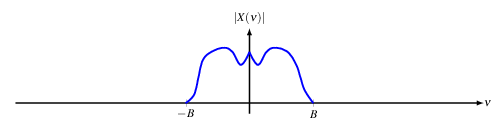

In [6]:
bandlimited

In that case, if $f_e >= 2B$, then the replicates do not overlap with each other.

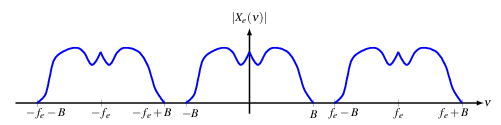

In [10]:
bandlimited_Nyquist

However, if $f_e < 2B$, the replicates overlap with each other. This phenomenon is called aliasing, and it engenders some loss of information.

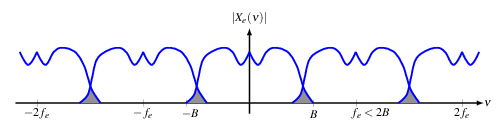

In [8]:
bandlimited_aliasing

**2.** If $x$ is not bandlimited, then aliasing occurs whatever the sampling frequency.

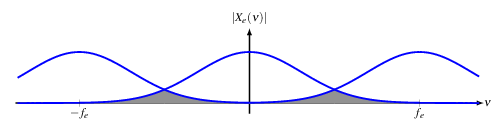

In [12]:
notbandlimited

From this, we can deduce Shannon sampling theorem. If we call $f_\text{max}$ the maximal frequency (that is, $B$) contained in the signal $x$, then  
**It is possible to exactly recover a bandlimited signal** $x$ **with maximal frequency** $f_\text{max}$ **if the sampling frequency** $f_e$ **satisfies**  

$$f_e \geq 2f_\text{max} $$


### Shannon interpolation formula

If the Nyquist condition $f_e \geq 2 f_\text{max}$ has been fulfilled during sampling, then Shannon sampling theorem states that is is possible to fully recover the analog signal $x(t)$ from its samples points $x_e(nT_e) = x(nT_e)$. As a matter of fact, the spectrum $X_e(\nu)$ the sampled signal $x_e(t)$ is a periodized version of the spectrum $X(\nu)$ of the original signal $x$. If we want to recover $x$ from $x_e$, we can "simply" filter $X_e(\nu)$ in order to keep only the part that is centered on $0$, which is $X(\nu)$. $x$ can then be retrived by inverting the obtained Fourier transform.

In [15]:
notfiltered = WImage(filename='Shannon_reconstruction.pdf')
filtered = WImage(filename='Shannon_reconstruction_filtered.pdf')
lowpassfilter = WImage(filename='Shannon_reconstruction_lowpassfilter.pdf')

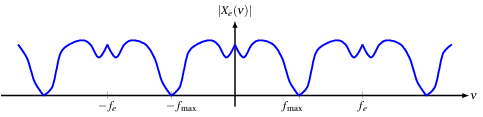

In [22]:
notfiltered

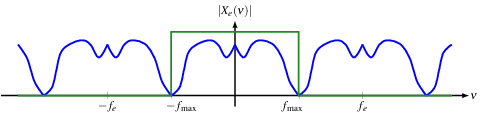

In [26]:
lowpassfilter

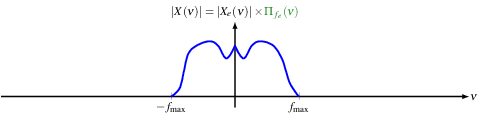

In [18]:
filtered

Mathematically, this _ideal_ lowpass filtering operation is modeled by the multiplication of $X_e(\nu)$ with a window function $\Pi_{f_e}(\nu)$ of width $f_e$ (since $f_e \geq 2f_\text{max}$, it well encompasses $X(\nu)$), thus we can write $X(\nu) = X_e(\nu)\times \Pi_{f_e}(\nu)$.  
Applyting the inverse Fourier transform and using Plancherel theorem yields $x(t) = x_e(t) \ast \left( \frac{\pi}{T_e}\text{sinc}\big(\frac{\pi}{T_e}t \big)\right)$, which (with a little bit of rework and using the fact that $\displaystyle x_e(t) = \sum_{n=-\infty}^{+\infty} x(nT_e) \delta(t-n T_e$) leads to Shannon-Whittaker interpolation formula
$$x(t) = \sum_{n=-\infty}^{+\infty} x(n T_e) \text{sinc}\left(\frac{\pi}{T_e}(t-n T_e) \right) $$

Thus, if Shannon sampling theorem has been respected, it is possible to reconstruct $x(t)$ as an infinite sum of cardinal sine waves centered on $nT_e$ and weighted by the sample magnitued at that time $x(nT_e)$.  

Let's see if we can empirically check it.

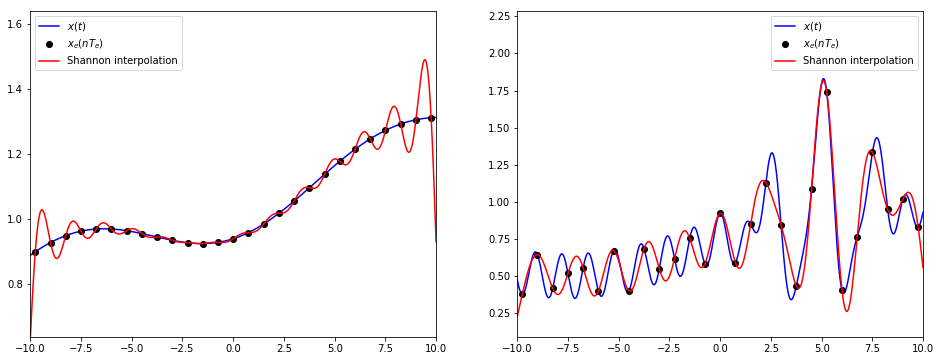

In [9]:
Te = 0.75
plt.figure(figsize=(16,6))
plt.subplot(121)
x_interp,te,xe = MASI.Shannon_interpolation(xlow,t,Te,Tech)
plt.plot(t,xlow,'b',label=r'$x(t)$')
plt.plot(te,xe,'ko',label=r'$x_e(n T_e)$')
plt.plot(t,x_interp,'r',label='Shannon interpolation')
plt.xlim(t.min(),t.max())
plt.ylim(xlow.min()-0.25,1.25*xlow.max())
plt.legend(loc='best')
plt.subplot(122)
x_interp,te,xe = MASI.Shannon_interpolation(xhigh,t,Te,Tech)
plt.plot(t,xhigh,'b',label=r'$x(t)$')
plt.plot(te,xe,'ko',label=r'$x_e(n T_e)$')
plt.plot(t,x_interp,'r',label='Shannon interpolation')
plt.xlim(t.min(),t.max())
plt.ylim(xhigh.min()-0.25,1.25*xhigh.max())
plt.legend(loc='best')
plt.show()


Apart on both sides of the time vector (but we can't do anything about this artifact here unfortunately...), it seems to work pretty well for the low-varying signal, but not for the high-varying one. Obviously, we need to decrease the sampling period for this one.  
Let's animate all of this.

In [11]:
MASI.visualize_Shannon_interpolation(xhigh,t,Tech)

So, yeah, it works... But the downside of Shannon interpolation is that the reconstruction is not causal. To reconstruct $x(t)$, we need all previous samples $x(nT_e),\ nT_e \leq t$, and all future samples $x(n T_e),\ nT_e > t$ as well.

### Aliasing

Aliasing occurs when the Nyquist condition $f_e \geq 2 f_\text{max}$ is not fulfilled. In that case, the signal that can be reconstructed from the samples is not the original one, but is such that their samples coincides for the sampling frequency $f_e$.

In [24]:
x_sin = np.sin(2*np.pi/1.2*t)

In [25]:
MASI.visualize_Shannon_interpolation(x_sin,t,Tech)